In [24]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer , PorterStemmer
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bibek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:

df = pd.read_csv('DataSet/dataset.csv')

In [38]:
df

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [18]:
## df.describe() and barplots seaborn

# Problem 9: Shuffling Data

In [ ]:
df = df.sample(frac=1)

# Problem 5: Text Lemmatization and Stemming 


In [39]:
%%time
##Lemmatization


lemmatizer = WordNetLemmatizer()

df['text_lemmatized'] = df['text'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

Wall time: 1.22 s


In [40]:
df['text_lemmatized'][0]

'go until jurong point , crazy.. available only in bugis n great world la e buffet ... cine there got amore wat ...'

In [41]:
%%time
##Stemming
stemmer = PorterStemmer()
df['text_steam'] = df['text'].map(lambda text: ' '.join(stemmer.stem(w) for w in nltk.word_tokenize(text.lower())))

Wall time: 1.95 s


In [42]:
df['text_steam'][0]

'go until jurong point , crazy.. avail onli in bugi n great world la e buffet ... cine there got amor wat ...'

# Problem 6: Word Clouds for both Spam and Hams


In [88]:
df['spam'] = df['spam'].map(dict(spam=1, ham=0))

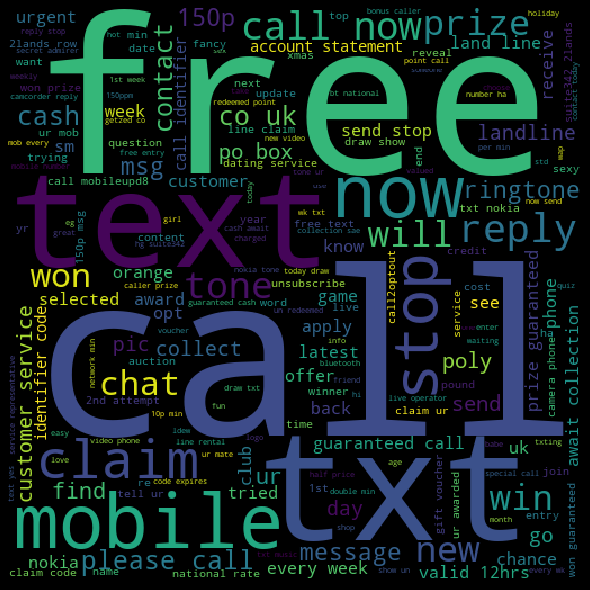

In [44]:
spam_words = ''.join(list(df[df['spam']==1]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


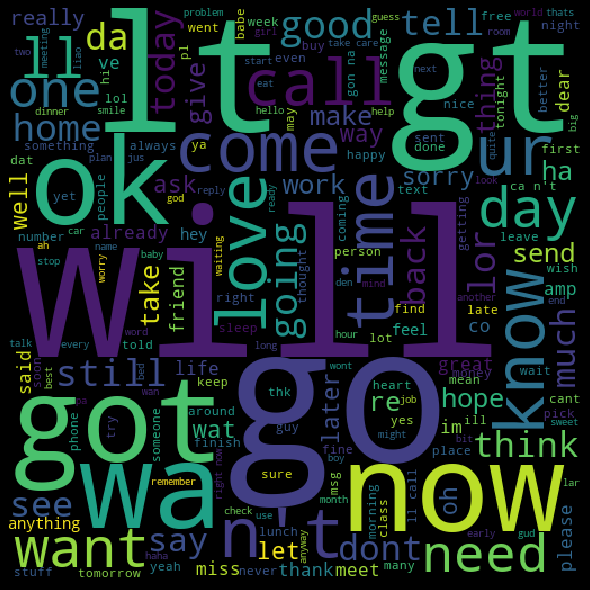

In [45]:
spam_words = ''.join(list(df[df['spam']==0]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

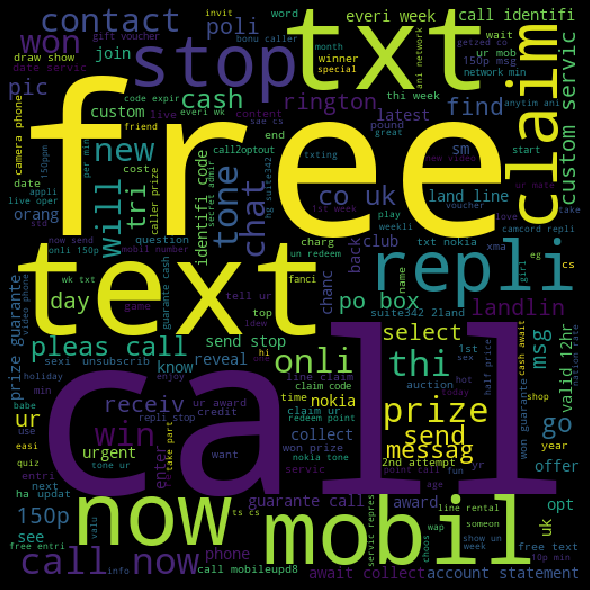

In [46]:
spam_words = ''.join(list(df[df['spam']==1]['text_steam']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

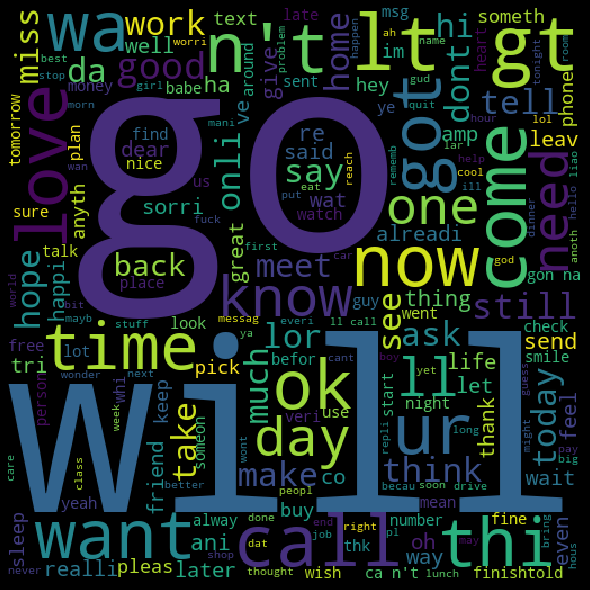

In [48]:
spam_words = ''.join(list(df[df['spam']==0]['text_steam']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [51]:
import numpy as np 
X = np.array(df['text_lemmatized'])
X.shape

(5574,)

# Problem 7: To numerical Feature Vector 

In [56]:
count_vect = CountVectorizer(lowercase=True, stop_words='english')
document_counts = count_vect.fit_transform(X)

# Problem 8: Feature and Target Vector


In [75]:
X = document_counts.toarray()
y = df['spam']

In [87]:
print('Shape of X:', X.shape,'\nShape of y: ',y.shape)

Shape of X: (5574, 7963) 
Shape of y:  (5574,)


# Partition the datset (80-20)

In [91]:

def split_trainTest(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [92]:
X_train, X_test, y_train, y_test = split_trainTest(X,y,t=0.2)

In [93]:
print('Shape of X_train',X_train.shape, 'Shape of X_test',X_test.shape)

Shape of X_train (4459, 7963) Shape of X_test (1115, 7963)
